In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
df = load_iris()
samples = df.data

In [46]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
model = KMeans(n_clusters=3)
model.fit(samples)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [43]:
labels = model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [44]:
new_samples = np.array([[5.7,4.4,1.5,0.4],
              [6.5,3,5.5,1.8],
              [5.8,2.7,5.1,1.9]])
new_labels = model.predict(new_samples)
print(new_labels)

[0 2 1]


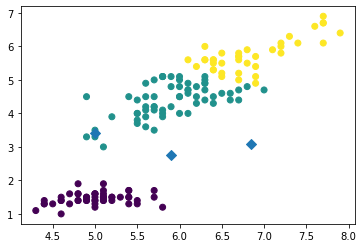

In [48]:
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
centroids = model.cluster_centers_
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]
plt.scatter(xs, ys, c=labels)
plt.scatter(centroid_x,centroid_y, marker='D',s=50)
plt.show()

In [30]:
import pandas as pd
species = np.concatenate([['setosa']*50, ['versicolor']*50, ['virginica']*50], axis=0)
dfn = pd.DataFrame({'labels':labels,'species':species})
print(dfn)

NameError: name 'labels' is not defined

In [57]:
ct = pd.crosstab(dfn['labels'],dfn['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          48         14
2             0           2         36


In [58]:
#inertia measures clustering quality
print(model.inertia_)

78.85144142614601


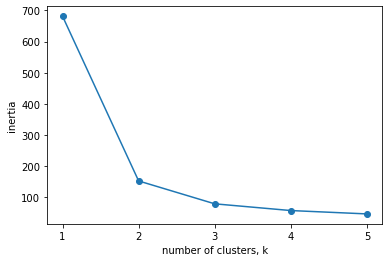

In [61]:
import warnings
warnings.filterwarnings('ignore')

ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
plt.plot(ks, inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [45]:
wine = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv')
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [68]:
wine.var().sort_values()

nonflavanoid_phenols        0.015489
hue                         0.052245
ash                         0.075265
proanthocyanins             0.327595
total_phenols               0.391690
od280                       0.504086
class_label                 0.600679
alcohol                     0.659062
flavanoids                  0.997719
malic_acid                  1.248015
color_intensity             5.374449
alcalinity_of_ash          11.152686
magnesium                 203.989335
proline                 99166.717355
dtype: float64

In [65]:
varieties = wine['class_name']
samples = wine.drop(['class_label','class_name'], axis=1)

In [66]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [67]:
df = pd.DataFrame({'labels':labels,
                  'varieties':varieties})
ct = pd.crosstab(df['labels'],df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               29      13          20
1                0      46           1
2               19       0          50


In [69]:
#transforming features for better clusterings
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

In [70]:
samples_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)

df = pd.DataFrame({'labels':labels,
                  'varieties':varieties})
ct = pd.crosstab(df['labels'],df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          65
1               48       0           3
2                0      59           3


## Visualizing Hierarchies

In [3]:
import pandas as pd
euro = 'https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv'
mus = 'https://assets.datacamp.com/production/repositories/655/datasets/c974f2f2c4834958cbe5d239557fbaf4547dc8a3/Musical%20artists.zip'
stocks ='https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv'
lcd = 'https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv'
wiki = 'https://assets.datacamp.com/production/repositories/655/datasets/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip'

ev = pd.read_csv(euro)
fin = pd.read_csv(stocks)
digits = pd.read_csv(lcd)

In [2]:
ev.info

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings,
          labels=country_names,
          leaf_rotation=90,
          leaf_font_size=6)
plt.show()

In [9]:
fin.columns

Index(['Unnamed: 0', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22',
       '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29'],
      dtype='object', length=964)

In [10]:
fin.rename(columns={'Unnamed: 0':'company'}, inplace=True)

In [11]:
fin.head()

,company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [39]:
import numpy as np
movements = np.array(fin.drop('company',axis=1))
companies = np.array(fin['company'])

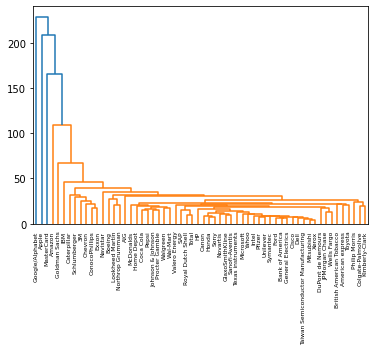

In [20]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(movements, method='complete')
dendrogram(mergings,
          labels=company,
          leaf_rotation=90,
          leaf_font_size=6)
plt.show()

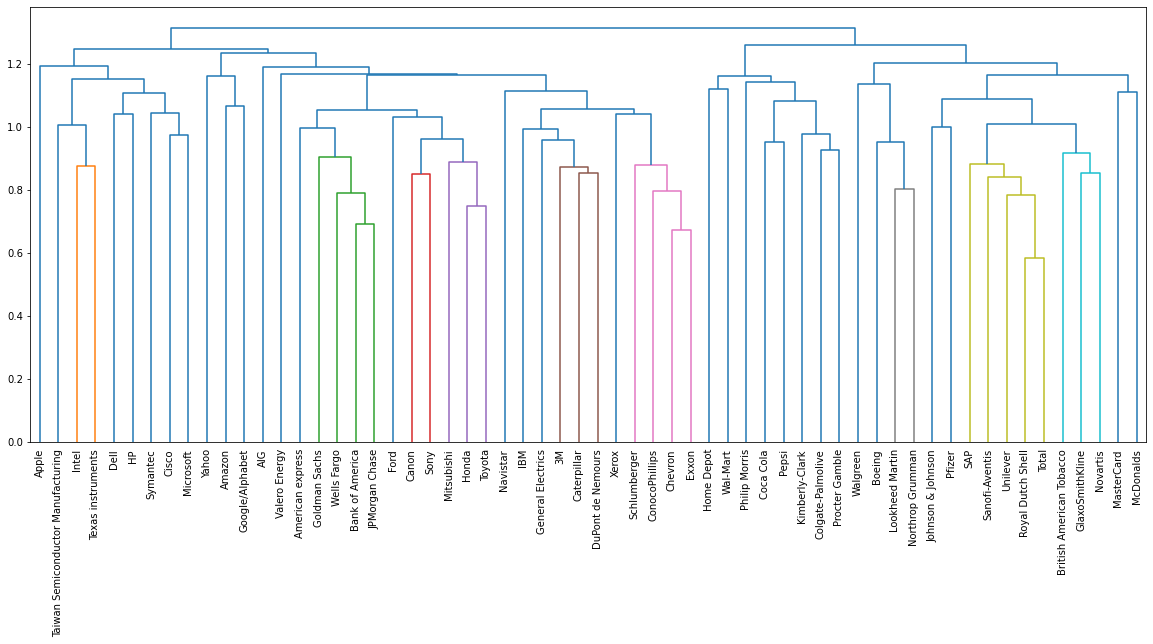

In [26]:
plt.figure(figsize=(20,8))
from sklearn.preprocessing import normalize
normalized_movements = normalize(movements)
mergings = linkage(normalized_movements, method='complete')
dendrogram(mergings,
          labels=company,
          leaf_rotation=90,
          leaf_font_size=10)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')

from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)

import pandas as pd
pairs = pd.DataFrame({'labels':labels,'countries':country_names})
print(pairs.sort_values('labels'))

In [49]:
## t-SNE = "t-distributed stochastic neighbor embedding"
samples = df.data
species = df.target

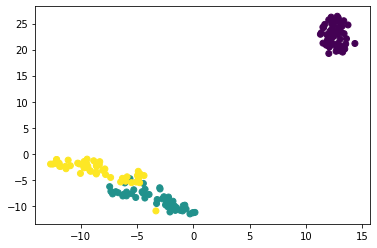

In [38]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=species);

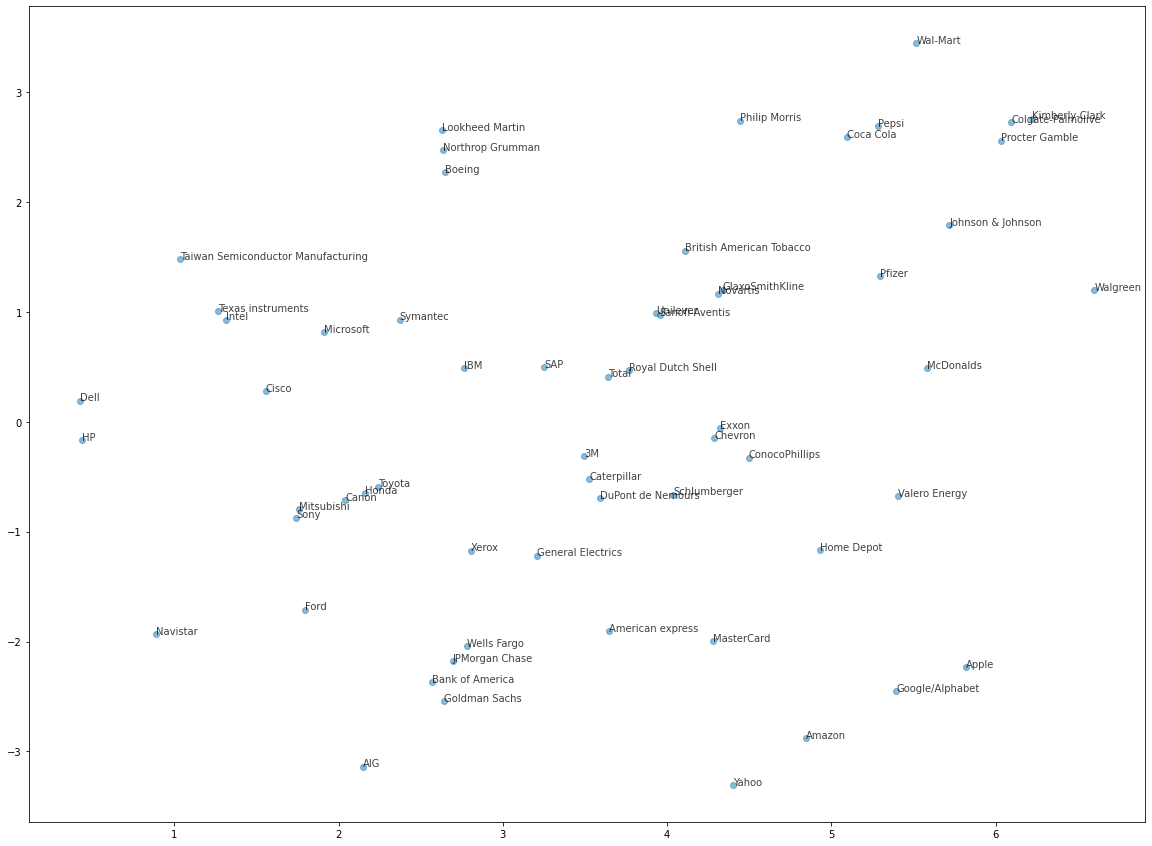

In [42]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(normalized_movements)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.figure(figsize=(20,15))
plt.scatter(xs, ys, alpha=0.5)
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company,(x,y), fontsize=10,alpha=0.75)
plt.show()

In [47]:
samples = np.array(wine[['total_phenols', 'od280']])

from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)

PCA()

In [48]:
transformed = model.transform(samples)

In [52]:
#all the versiscolor samples
vers = samples[50:101]
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(vers)

PCA()

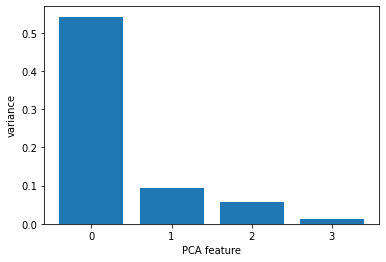

In [54]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [ ]:
#untranformed points
plt.scatter(grains[:,0], grains[:,1])
model = PCA()
model.fit(grains)
mean = model.mean_
first_pc = model.components_[0,:]
plt.arrow(mean[0], mean[1],first_pc[0],first_pc[1], color='red', width=0.01)
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandarScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(samples)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()